#Στοιχεία σπουδαστή

<h3>Σκουρτσίδης Γεώργιος 

<h3>ΑΜ: 03114307

# Περιγραφή Άσκησης

Σκοπός της Άσκησης είναι η εξοικείωση του φοιτητή με την εφαρμογή κριτηρίων αξιολόγησης της
διακριτικής ικανότητας αισθητήρων καταγραφής φυσιολογικών παραμέτρων

Στο πλαίσιο αυτής της άσκησης, σας δίνονται δεδομένα χρονοσειρών γλυκόζης ατόμων με σακχαρώδη
διαβήτη τύπου 1, τα οποία προέκυψαν από την εφαρμογή υπολογιστικών πειραμάτων ανοικτού βρόχου
στον προσομοιωτή UVa T1DM. Ο προσομοιωτής UVa T1DM είναι ένα υπολογιστικό περιβάλλον που
διαθέτει εικονικούς ασθενείς (παιδιά, έφηβους, ενήλικες) με σακχαρώδη διαβήτη τύπου 1 και έχει λάβει
έγκριση από τον Αμερικανικό Οργανισμό Φαρμάκων (FDA) για να χρησιμοποιείται ως υποκατάσταστο
προκλινικών δοκιμών για την αξιολόγηση ελεγκτών γλυκόζης. 

Τα δεδομένα που σας δίνονται αντιστοιχούν σε περίπου 3.5 ημέρες και αποτελούνται από τρεις στήλες:
(i) στη στήλη Α παρουσιάζεται ο χρόνος σε λεπτά, (ii) στη στήλη Β, οι τιμές γλυκόζης αίματος σε mg/dl, και
(iii) στη στήλη C, οι καταγραφές γλυκόζης από αισθητήρα συνεχούς καταγραφής γλυκόζης σε mg/dl.
Συνήθως οι αισθητήρες συνεχούς καταγραφής γλυκόζης παρουσιάζουν ανακρίβειες και αποκλίσεις από
την γλυκόζη αναφοράς (γλυκόζη αίματος). Σε αυτήν την άσκηση, καλείστε να αξιολογήσετε την ακρίβεια
των αισθητήρων συνεχούς καταγραφής γλυκόζης, εφαρμόζοντας κατάλληλα κριτήρια αξιολόγησης, όπως
το Root Mean Square Error και η ROC ανάλυση. 

# Ερωτήσεις

Load and inspect file

In [49]:
import pandas as pd

df = pd.read_csv("Data.csv")
df

,Time (min),Blood Glucose (mg/dl),Sensor Glucose Readings(mg/dl)
0,1,115.526179,111.321873
1,2,115.083206,110.681463
2,3,114.641643,110.017730
3,4,114.201571,109.330894
4,5,113.763064,108.621170
...,...,...,...
5035,5036,86.231078,98.045214
5036,5037,85.742479,97.447153
5037,5038,85.257889,96.853636
5038,5039,84.777106,96.264621


Αλλαγή ονομάτων σε στήλες για ευκολότερη διαχείριση παρακάτω.

In [50]:
df = df.rename(columns={"Time (min)":"time",	"Blood Glucose (mg/dl)":"real",	"Sensor Glucose Readings(mg/dl)":"predicted"})
df.head()

,time,real,predicted
0,1,115.526179,111.321873
1,2,115.083206,110.681463
2,3,114.641643,110.017730
3,4,114.201571,109.330894
4,5,113.763064,108.621170


## Ερώτηση 1 - RMSE



Να εφαρμόσετε την τετραγωνική ρίζα του μέσου τετραγωνικού σφάλματος (Root Mean Square Error
(RMSE)) για να αξιολογήσετε κατά πόσο οι καταγραφές γλυκόζης από τον αισθητήρα προσεγγίζουν τις
τιμές γλυκόζης αίματος.

In [51]:
def rmse(df):
    return ((df.predicted - df.real) ** 2).mean() ** .5

print(f"RMSE: {rmse(df)}")

RMSE: 20.329218585736974


To RMSE υποδεικνύει την προσαρμογή του μοντέλου στα δεδομένα, δηλαδή πόσο κοντά βρίσκονται τα παρατηρούμενα σημεία στις προβλεπόμενες τιμές του μοντέλου.Το RMSE μπορεί να ερμηνευθεί ως η τυπική απόκλιση της ανεξήγητης διακύμανσης και έχει την χρήσιμη ιδιότητα να βρίσκεται στις ίδιες μονάδες με τα δεδομένα μας. Οι χαμηλότερες τιμές του RMSE υποδεικνύουν καλύτερη εφαρμογή. Το RMSE είναι ένα μέτρο για το πόσο ακριβώς το μοντέλο προβλέπει τα πραγματικά δεδομένα.

## Ερώτηση 2 - Υπογλυκαιμίες

Θεωρώντας ως υπογλυκαιμικά επεισόδια τις τιμές γλυκόζης που είναι μικρότερες από 70 mg/dl, να
εφαρμόσετε τη ROC ανάλυση για να αξιολογήσετε την ικανότητα του αισθητήρα συνεχούς
καταγραφής γλυκόζης να ανιχνεύει τις υπογλυκαιμίες. Εφαρμόζοντας την τιμή 70 mg/dl ως κατώφλι
γλυκόζης, οι χρονοσειρές γλυκόζης αντιμετωπίζονται ως δυαδικές και με αυτό τον τρόπο καθίσταται
εφικτή η εφαρμογή της ROC ανάλυσης. Να υπολογίσετε τους δείκτες: Ευαισθησία, Ειδικότητα, Θετική
Διαγνωστική Αξία, Αρνητική Διαγνωστική Αξία, Ακρίβεια.

In [52]:
# 0 - όχι υπογλυκαιμικό επεισόδιο (>=70)
# 1 - υπογλυκαιμικό επεισόδιο (<70)

threshold = 70

df_under = df.copy()
df_under['predicted'] = (df['predicted'] < threshold).astype(int)
df_under['real'] = (df['real'] < threshold).astype(int)
df_under.head()

,time,real,predicted
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,0,0


### Confusion matrix

In [53]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(df_under['real'].to_numpy(), df_under['predicted'].to_numpy())
print("Confusion Matrix\n\n",conf_matrix)

Confusion Matrix

 [[3774   49]
 [  75 1142]]


Prettier output

In [54]:
import seaborn as sns
import numpy as np

def plot_conf_matrix(conf_matrix):
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ["{0:0.0f}".format(value) for value in
                  conf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                      conf_matrix.flatten()/np.sum(conf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

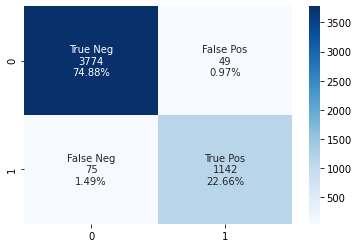

In [55]:
plot_conf_matrix(conf_matrix)

In [56]:
# from the confusion matrix
TP = true_pos = conf_matrix[1][1]
TN = true_neg = conf_matrix[0][0]
FP = false_pos = conf_matrix[0][1]
FN = false_neg = conf_matrix[1][0]

### Δείκτες αξιολόγησης

In [57]:
def set_metrics(TP,TN,FP,FN,results):
  results["TPR"] = TP / (TP + FN) # Sensitivity or Recall
  results["TNR"] = TN / (TN + FP) # Specificity
  results["PPV"] = TP / (TP + FP) # Precision
  results["NPV"] = TN / (TN + FN) # Νegative Predictive Value
  results["ACC"] = (TP + TN) / (TP + TN + FP + FN) # Accuracy
  return results

#### Περιγραφή δεικτών/μετρικών

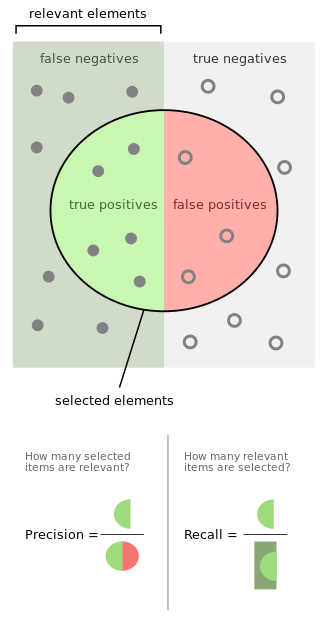

<h4> Ευαισθησία (True Positive Rate)</h4>

Αριθμός δειγμάτων κατηγοριοποιημένος ως `Positive` / πραγματικός αριθμός δειγμάτων που είναι `Positive`  

Ποσοστό των actual θετικών που αναγνωρίστηκαν σωστά (πόσα σχετικά επιλέγονται). Περιγράφει πόσο καλό είναι το μοντέλο στην πρόβλεψη της θετικής κλάσης όταν το πραγματικό αποτέλεσμα είναι θετικό.

Αλλιώς λέγεται **Ευαισθησία ή Ανάκληση - Sensitivity ή Recall**. 

$TPR = \frac{TP}{P} = \frac{TP}{(TP+FN)}$


<h4> Ειδικότητα (True Negative Rate)</h4>

Αριθμός δειγμάτων κατηγοριοποιημένος ως `Negative` / πραγματικός αριθμός δειγμάτων που είναι `Negative`  
Αλλιώς λέγεται **Ειδικότητα - Specificity**.  
$SPC = \frac{TN}{N} = \frac{TN}{(TN+FP)}$


<h4> Θετική Διαγνωστική Αξία</h4>

Positive Predictive Value. Ποσοστό των θετικών που είναι σωστά (πόσα επιλεγμένα είναι σχετικά)

Λέγεται επίσης **Precision**.  


$PPV = \frac{TP}{(TP + FP)}$


<h4>Αρνητική Διαγνωστική Αξία</h4>


Λέγεται και Negative Predictive Value


$NPV = \frac{TN}{(TN + FN)}$


<h4> Ακρίβεια (Accuracy )</h4>


Αριθμός σωστών προβλέψεων / συνολικός αριθμός δειγμάτων

$ACC = \frac{TP + TN}{(TN + TN + FP + FN)}$

#### Συγκριση δεικτών

In [58]:
def print_metrics(results,df):
  print(f"Aκρίβεια:                                     {results['ACC']: .3f}")
  print(f"Ειδικότητα:                                   {results['TNR']: .3f}")
  print(f"Ευαισθησία:                                   {results['TPR']: .3f}")
  print(f"Θετική Διαγνωστική Αξία:                      {results['PPV']: .3f}")
  print(f"Αρνητική Διαγνωστική Αξία:                    {results['NPV']: .3f}")

In [59]:
results = set_metrics(TP,TN,FP,FN,{})
print_metrics(results,df_under)

Aκρίβεια:                                      0.975
Ειδικότητα:                                    0.987
Ευαισθησία:                                    0.938
Θετική Διαγνωστική Αξία:                       0.959
Αρνητική Διαγνωστική Αξία:                     0.981


### Γράφημα ROC και Precision-Recall

<h3> ROC </h3>

Θα σχεδιάσουμε το ROC γράφημα και το Precision-Recall για ένα μόνο threshold (δε θα πραγματοποιήσουμε εξαντλητική αναζήτηση για την εύρεση του βέλτιστου threshold). 

Το ROC είναι  μια γραφική παράσταση του ψευδώς θετικού ρυθμού(ειδικότητα) (άξονας x) έναντι του πραγματικού θετικού ρυθμού(ευαισθησία) (άξονας y) για έναν αριθμό διαφορετικών τιμών κατωφλίου μεταξύ 0 και 1.


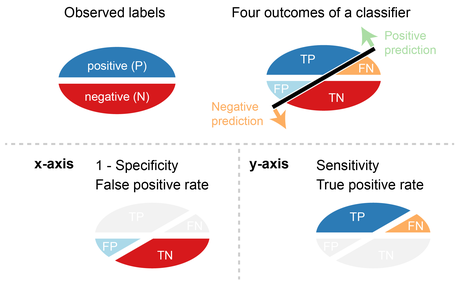

Ένας τυχαίος ταξινομητής δείχνει πάντα μια ευθεία γραμμή από την αρχή (0,0) έως την επάνω δεξιά γωνία (1,1). Οι καμπύλες ROC στην περιοχή με την επάνω αριστερή γωνία (0, 1) υποδεικνύουν καλά επίπεδα απόδοσης, ενώ οι καμπύλες ROC στην άλλη περιοχή με την κάτω δεξιά γωνία (1,0) υποδεικνύουν χαμηλά επίπεδα απόδοσης.

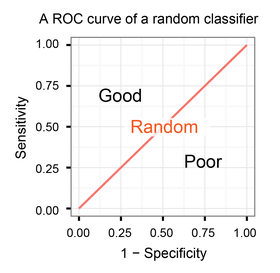

Όσο πιο αριστερά βρίσκεται ένα σημείο στο γράφημα ROC τόσο μειώνεται το ποσοστό των False Positives.Ιδανικά θέλουμε ένα σημείο που να βρίσκεται κοντά ή πάνω στον $y'y$ άξονα $(x=0)$ και κοντά στην τιμή $1$ στον $y'y$  $(y=1)$.

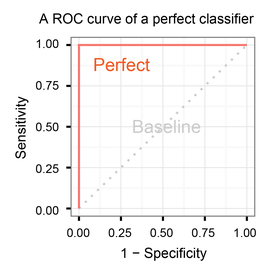



Οι μικρότερες τιμές στον άξονα-x της γραφικής παράστασης δείχνουν χαμηλότερα ψευδώς θετικά και υψηλότερα αληθινά αρνητικά.
Μεγαλύτερες τιμές στον άξονα y της γραφικής παράστασης δείχνουν υψηλότερα αληθινά θετικά και χαμηλότερα ψευδώς αρνητικά.

Το γράφημα αυτό μας δείχνει την καλύτερη τιμή για το threshold, ανάλογα με το πόσα False Positive είμαστε διαθετιμένοι να αποδεχτούμε (ανάλογα με το εκάστοτε πρόβλημα). 

<h2> Precision - Recall </h2>

Η γραφική παράσταση ακρίβειας-ανάκλησης χρησιμοποιεί ανάκληση στον άξονα x και την ακρίβεια στον άξονα y. Η ανάκληση είναι πανομοιότυπη με την ευαισθησία και η ακρίβεια είναι ίδια με θετική προγνωστική τιμή.

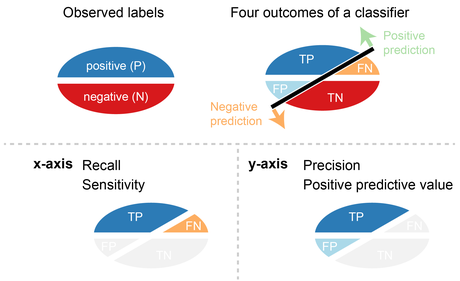

Αντίστοιχα παρουσιάζονται ο τυχαίος ταξινομητής και ο τέλειος ταξινομητής σε precision-recall γράφημα.

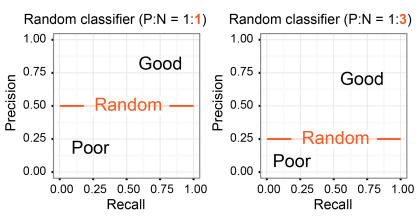

Ένας τυχαίος ταξινομητής δείχνει μια ευθεία γραμμή ως P / (P + N). Για παράδειγμα, η γραμμή είναι y = 0.5 όταν ο λόγος θετικών και αρνητικών είναι 1:1, ενώ 0.25 όταν ο λόγος είναι 1:3.

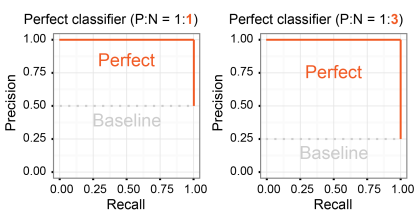

Ένας τέλειος ταξινομητής δείχνει έναν συνδυασμό δύο ευθειών γραμμών. Το τελικό σημείο εξαρτάται από την αναλογία θετικών και αρνητικών. Για παράδειγμα, το τελικό σημείο είναι (1.0, 0.5) όταν ο λόγος θετικών και αρνητικών είναι 1:1, ενώ (1.0, 0.25) όταν ο λόγος είναι 1:3.

Ένα σημείο στο ROC γράφημα έχει 1-1 αντιστοίχιση στο γράφημα Precision-Recall

In [60]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_presision_recall(df):
  # Get ROC curve FPR and TPR from true labels vs score values
  fpr, tpr, thres = roc_curve(df['real'].to_numpy(), df['predicted'].to_numpy())

  # Calculate ROC Area Under the Curve (AUC) from FPR and TPR data points
  roc_auc = auc(fpr, tpr)

  # Calculate precision and recall from true labels vs score values
  precision, recall, thres = precision_recall_curve(df_under['real'].to_numpy(), df_under['predicted'].to_numpy())

  plt.figure(figsize=(8, 3))

  plt.subplot(1,2,1)
  lw = 2
  plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc="lower right")
  plt.grid(True)

  plt.subplot(1,2,2)
  plt.step(recall, precision, color='orange', where='post')
  # plt.fill_between(recall, precision, step='post', alpha=0.5, color='orange')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])
  plt.title('Precision - Recall Curve')
  plt.grid(True)

  left  = 0.125  # the left side of the subplots of the figure
  right = 0.9    # the right side of the subplots of the figure
  bottom = 0.1   # the bottom of the subplots of the figure
  top = 0.9      # the top of the subplots of the figure
  wspace = 0.5   # the amount of width reserved for blank space between subplots
  hspace = 0.2   # the amount of height reserved for white space between subplots
  plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
  plt.show()

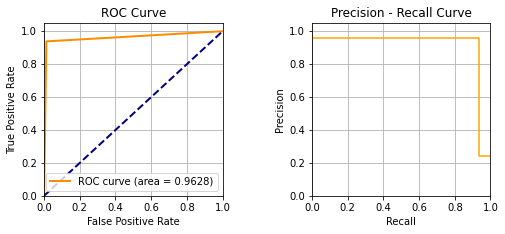

In [61]:
plot_roc_presision_recall(df_under)

Το threshold αυτό μας έδωσε ένα σημείο στο ROC πολύ κοντά στην τιμή (1,0) και στο Precision-Recall ακριβώς πάνω στο (1,1), πράγμα που σημαίνει πως έκανε πολύ καλή δουλειά στην κατηγοριοποίηση των δειγμάτων. 

## Ερώτηση 3 - Υπεργλυκαιμίες

Ομοίως, να αξιολογήσετε την ικανότητα του αισθητήρα συνεχούς καταγραφής γλυκόζης να ανιχνεύει
τις υπεργλυκαιμίες που αντιστοιχούν σε τιμές γλυκόζης μεγαλύτερες από 180 mg/dl. Να υπολογίσετε
τους δείκτες: Ευαισθησία, Ειδικότητα, Θετική Διαγνωστική Αξία, Αρνητική Διαγνωστική Αξία, Ακρίβεια

In [62]:
# 0 - όχι υπερ-γλυκαιμικό επεισόδιο 
# 1 - υπερ-γλυκαιμικό επεισόδιο 

threshold = 180

df_over = df.copy()
df_over['predicted'] = (df['predicted'] > threshold).astype(int)
df_over['real'] = (df['real'] > threshold).astype(int)
df_over.head()

,time,real,predicted
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,0,0


### Confusion matrix

In [63]:
conf_matrix = confusion_matrix(df_over['real'].to_numpy(), df_over['predicted'].to_numpy())
print("Confusion Matrix\n\n",conf_matrix)

Confusion Matrix

 [[4348  130]
 [  92  470]]


Prettier output

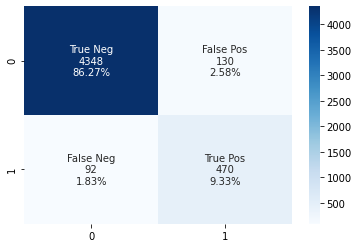

In [64]:
plot_conf_matrix(conf_matrix)

In [65]:
# from the confusion matrix
TP = true_pos = conf_matrix[1][1]
TN = true_neg = conf_matrix[0][0]
FP = false_pos = conf_matrix[0][1]
FN = false_neg = conf_matrix[1][0]

### Δείκτες αξιολόγησης

In [66]:
results = set_metrics(TP,TN,FP,FN,{})
print_metrics(results,df_over)

Aκρίβεια:                                      0.956
Ειδικότητα:                                    0.971
Ευαισθησία:                                    0.836
Θετική Διαγνωστική Αξία:                       0.783
Αρνητική Διαγνωστική Αξία:                     0.979


### Γράφημα ROC και Precision-Recall

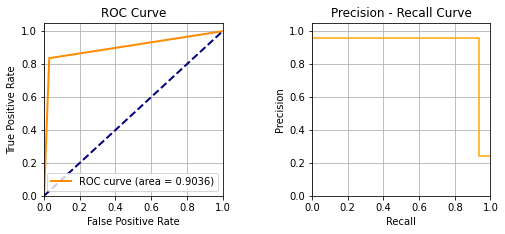

In [67]:
plot_roc_presision_recall(df_over)

Το threshold αυτό μας έδωσε ένα σημείο στο ROC πολύ κοντά στην τιμή (1,0) και στο Precision-Recall κοντά στο (1,1), πράγμα που σημαίνει πως έκανε πολύ καλή δουλειά στην κατηγοριοποίηση των δειγμάτων. 

## Ερώτηση 4 - Σχολιασμός
Με βάση τα αποτελέσματα των ερωτημάτων 1, 2, και 3, να αναφέρετε τα συμπεράσματά σας σχετικά
την ικανότητα του αισθητήρα συνεχούς καταγραφής γλυκόζης να ανιχνεύει τις υπογλυκαιμίες και τις
υπεργλυκαιμίες.

Τα αποτελέσματα από τα προηγούμενα ερωτήματα είναι ιδιαίτερα ενθαρρυντικά. Στις υπογλυκαιμίες ο confusion matrix μας δίνει 

<script src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.5/latest.js?config=TeX-AMS_CHTML-full"></script>

\begin{array}{|c|c|}
\hline
   3774 & 49   \\
\hline
   75 & 1142 \\
\hline
\end{array}

Οι μετρικές:
\begin{array}{|c|c|}
\hline
Aκρίβεια & 0.975\\
Ειδικότητα&        0.987\\
Ευαισθησία & 0.938\\
Θετική\space Διαγνωστική\space Αξία: & 0.959 \\
Αρνητική\space Διαγνωστική\space Αξία & 0.981\\
\hline
\end{array}

                     
Στις υπερ-γλυκαιμίες: \begin{array}{|c|c|}
\hline
   4348 & 130   \\
\hline
   92 & 470 \\
\hline
\end{array}

Οι μετρικές:
\begin{array}{|c|c|}
\hline
Aκρίβεια & 0.956\\
Ειδικότητα & 0.971\\
Ευαισθησία & 0.836\\
Θετική\space Διαγνωστική\space Αξία: & 0.783 \\
Αρνητική\space Διαγνωστική\space Αξία & 0.979\\
\hline
\end{array}

Παρατηρώντας το ROC και Precision-Recall γράφημα βλέπουμε πως τα αποτελέσματα είναι σχεδόν τέλεια.Το ίδιο βλέπουμε και παρατηρώντας τις μετρικές,καθώς πετυχαίνουν υψηλές τιμές.

 Η βελτίωση που ίσως θα μπορούσαμε να κάνουμε θα ήταν να μειώσουμε τα False Negatives, καθώς είναι ιδιαίτερα επικίνδυνα σε ένα ιατρικό ζήτημα,όπως το αναφερόμενο. Θα προτιμήσουμε αύξηση του Specificity σε βάρος όλων των άλλων μετρικών. Είναι προτιμότερο το σύστημα να κάνει πιο συχνά "false alarm" παρά να λέει (έστω και σπάνια) σε έναν άνθρωπο που έχει πρόβλημα πως όλα είναι καλά. Το 1ο είναι απλώς ενοχλητικό, το 2ο είναι επικίνδυνο.